PROJECT 1 : 
Taiwanese Bankruptcy Prediction

PROBLEM STATEMENT:-
The goal of this project is to develop a predictive model for company bankruptcy using data collected from the Taiwan Economic 
Journal for the years 1999 to 2009. The dataset includes financial and operational metrics of companies listed on the Taiwan Stock
Exchange, with bankruptcy defined according to the exchange's business regulations. The challenge is to identify key indicators and
patterns that can accurately predict the likelihood of a company's bankruptcy.

In [974]:
import numpy as np
import pandas as pd
df  = pd.read_csv("C://Users//NIRBHAY IMI-K//Desktop//Assignment ML//Train data.csv")

In [975]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


CLEANING THE DATA

In [976]:
df.shape

(6819, 96)

In [977]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [978]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [979]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [980]:
df.duplicated().sum()

0

In [981]:
df.rename(columns={'Bankrupt?': 'Bankrupt'},inplace = True)

In [982]:
df.head(2)

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


PERFORMING SCALING

In [983]:
from sklearn.preprocessing import StandardScaler

In [984]:
ss = StandardScaler()

In [985]:
df.columns

Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit 

In [986]:
cols = [' Operating Expense Rate',' Research and development expense rate',' Interest-bearing debt interest rate',
        ' Revenue Per Share (Yuan ¥)',' Total Asset Growth Rate',' Net Value Growth Rate',' Current Ratio', ' Quick Ratio',' Total debt/Total net worth',
        ' Accounts Receivable Turnover', ' Average Collection Days',' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',' Revenue per person',
        ' Allocation rate per person',' Quick Assets/Current Liability', ' Cash/Current Liability',' Inventory/Current Liability',' Long-term Liability to Current Assets',
        ' Current Asset Turnover Rate',' Quick Asset Turnover Rate',' Cash Turnover Rate',' Fixed Assets to Assets',' Total assets to GNP price']

In [987]:
df[cols]=ss.fit_transform(df[cols])

In [988]:
df.head(2)

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,-0.049491,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,-0.049491,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


In [989]:
df.drop([" Liability-Assets Flag"," Net Income Flag"], axis=1,inplace=True)

In [990]:
df.head(2)

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,-0.049491,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,-0.049491,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794


In [991]:
df['Bankrupt'].value_counts()

Bankrupt
0    6599
1     220
Name: count, dtype: int64

In [992]:
220/6599

0.03333838460372784

In [993]:
import matplotlib.pyplot as plt
import seaborn as sns

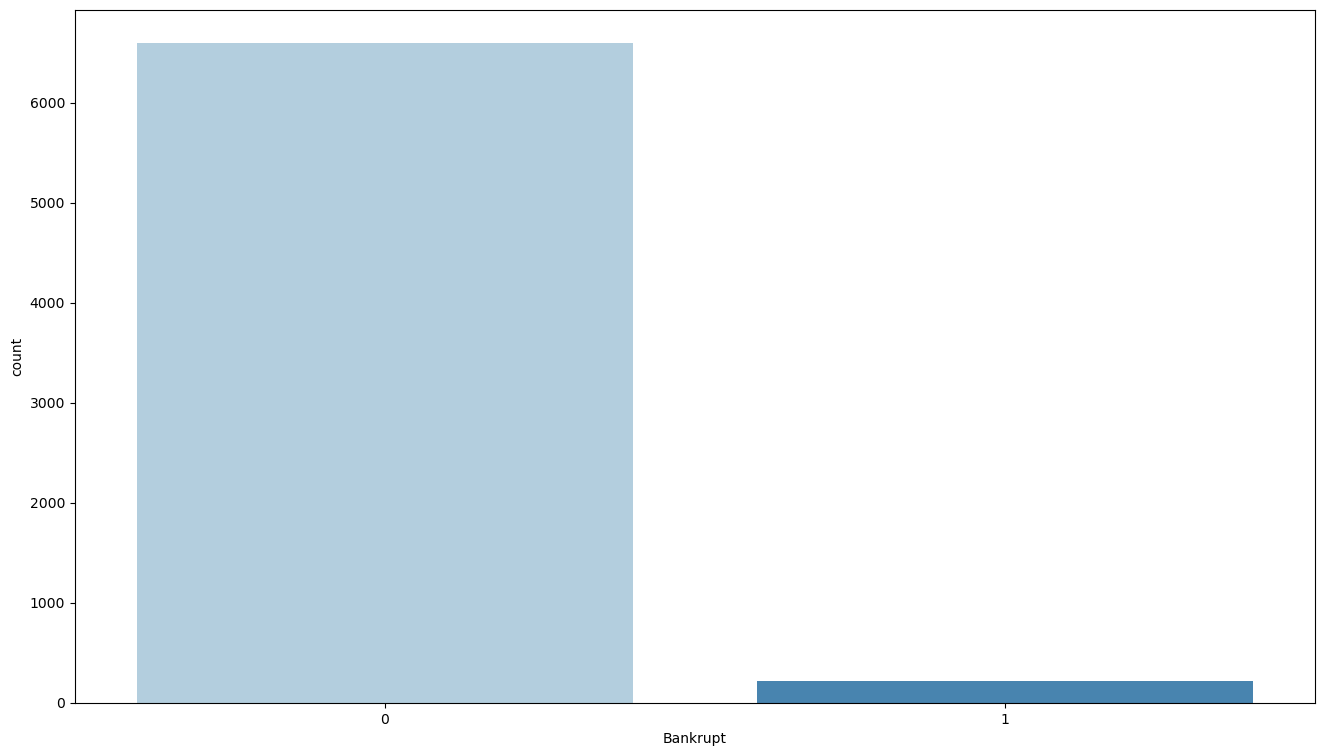

In [994]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt',data = df,palette ='Blues' )
plt.show()

In [995]:
from imblearn.over_sampling import SMOTE

In [996]:
X=df.drop(labels=['Bankrupt'], axis=1)
y=df['Bankrupt']

In [997]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

In [998]:
y.value_counts()

Bankrupt
1    6599
0    6599
Name: count, dtype: int64

<Axes: xlabel='Bankrupt', ylabel='count'>

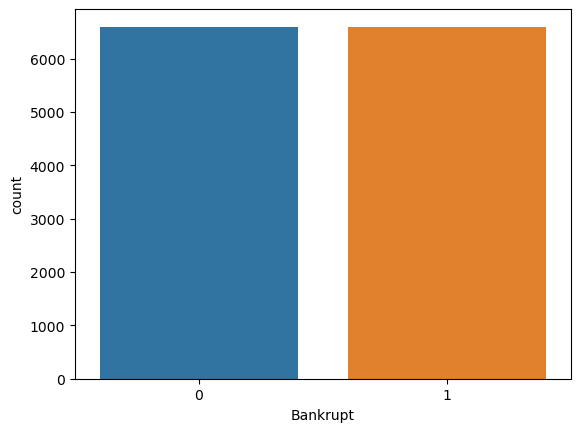

In [999]:
sns.countplot(x=y)

DIVIDING THE DATA INTO TRAINING AND TESTING

In [1000]:
from sklearn.model_selection import train_test_split
y=df['Bankrupt']
X= df[[' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Cash/Total Assets',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Inventory/Working Capital', ' Inventory/Current Liability',
       ' Current Liabilities/Liability', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Total expense/Assets', ' Current Asset Turnover Rate',
       ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate',
       ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets',
       ' Current Liability to Liability', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets',
       ' Net Income to Total Assets', ' Total assets to GNP price',
       ' No-credit Interval', ' Gross Profit to Sales',
       ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)', ' Equity to Liability']]

In [1001]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [1002]:
X_train.shape

(4773, 92)

In [1003]:
X_test.shape

(2046, 92)

MODEL BASED ON FOLLOWING:-
RANDOM FOREST,KNN,XGBOOST

USE THE ALGORITHM RANDOM FOREST

USE THE ALGORITHM KNN

In [1004]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [1005]:
from sklearn.ensemble import RandomForestClassifier

In [1006]:
clf=RandomForestClassifier(n_estimators=100)

In [1007]:
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [1008]:
from sklearn import metrics

In [1009]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[1976,    4],
       [  54,   12]], dtype=int64)

In [1010]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1980
           1       0.75      0.18      0.29        66

    accuracy                           0.97      2046
   macro avg       0.86      0.59      0.64      2046
weighted avg       0.97      0.97      0.96      2046



In [1011]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision ", precision_score(y_test, y_pred))
print ("Recall ",recall_score(y_test, y_pred))
print ("F1 Score ",f1_score(y_test, y_pred))

Accuracy: 0.9716520039100685
Precision  0.75
Recall  0.18181818181818182
F1 Score  0.2926829268292683


In [1012]:
X_train.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

In [1013]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

 Persistent EPS in the Last Four Seasons    0.029481
 Net Value Per Share (B)                    0.029200
 Net profit before tax/Paid-in capital      0.028988
 Net Value Per Share (C)                    0.027403
 Net Value Per Share (A)                    0.023824
                                              ...   
 Total assets to GNP price                  0.000000
 Current Ratio                              0.000000
 Revenue Per Share (Yuan ¥)                 0.000000
 Allocation rate per person                 0.000000
 Average Collection Days                    0.000000
Length: 92, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


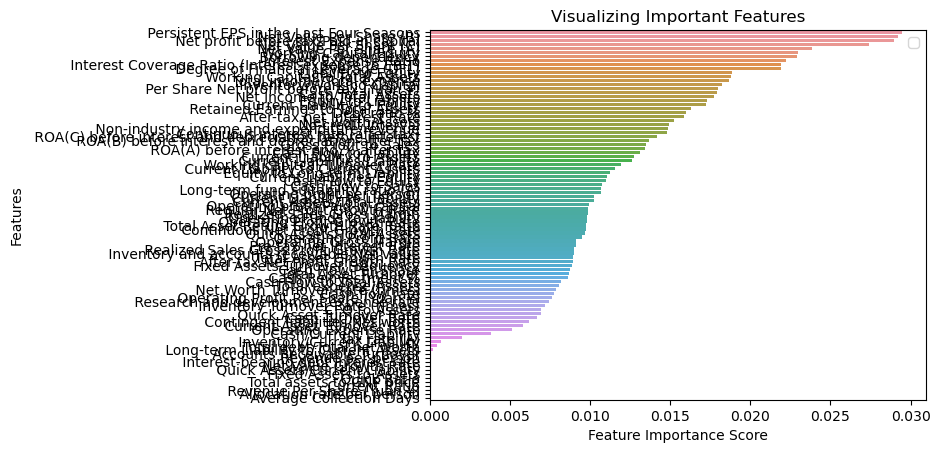

In [1014]:
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [1015]:
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

In [1016]:
from sklearn.neighbors import KNeighborsClassifier

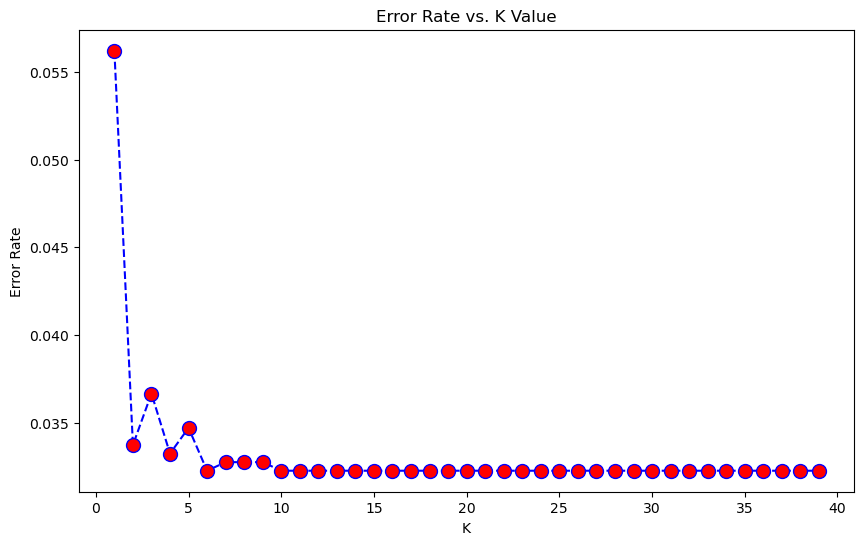

Minimum error:- 0.032258064516129004 at K = 6


In [1017]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [1018]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [1019]:
y_pred = knn.predict(X_test)

In [1020]:
metrics.confusion_matrix(y_test, y_pred)

array([[1979,    1],
       [  66,    0]], dtype=int64)

In [1021]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046



In [1022]:
print ("Accuracy_score", accuracy_score(y_test, y_pred))
print ("Precision ", precision_score(y_test, y_pred))
print ("Recall ",recall_score(y_test, y_pred))
print ("F1 Score ",f1_score(y_test, y_pred))

Accuracy_score 0.9672531769305963
Precision  0.0
Recall  0.0
F1 Score  0.0


USE THE ALGORITHM XG BOOST

In [1023]:
import xgboost as xgb

In [1024]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [1025]:
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [1026]:
print ("Accuracy_score", accuracy_score(y_test, y_pred_xgb))
print ("Precision ", precision_score(y_test, y_pred_xgb))
print ("Recall ",recall_score(y_test, y_pred_xgb))
print ("F1 Score ",f1_score(y_test, y_pred_xgb))

Accuracy_score 0.9740957966764419
Precision  0.76
Recall  0.2878787878787879
F1 Score  0.41758241758241765


# COMPARING THE PERFORMANCE OF THE ALGORITHMS :-

# The given metrics reflect the performance of a Random Forest classifier. Here's the interpretation of each metric:

Accuracy (0.9717): This indicates that approximately 97.17% of the predictions made by the model are correct. Accuracy measures the proportion of total correct predictions (both true positives and true negatives) to the total number of instances.

Precision (0.75): Precision, also known as the positive predictive value, indicates that 75% of the instances classified as positive by the model are actually positive. It is calculated as the number of true positives divided by the sum of true positives and false positives. A precision of 0.75 suggests that the model is relatively good at identifying positive instances, but not perfect.

Recall (0.1818): Also known as sensitivity or true positive rate, recall measures the proportion of actual positive instances that are correctly identified by the model. With a recall of 0.1818, the model only correctly identifies approximately 18.18% of the actual positive cases. This low recall indicates that the model misses a significant number of positive instances.

F1 Score (0.2927): The F1 score is the harmonic mean of precision and recall, providing a balance between the two. It is a better measure than accuracy in cases of class imbalance. An F1 score of 0.2927 indicates a trade-off between precision and recall. Given the relatively low recall, the F1 score is also low, shows that the model's performance in identifying positive cases is limited.

Interpretation
The model shows high accuracy, but the low recall and F1 score indicate that it struggles to identify positive instances correctly. The high accuracy could be due to a large number of true negatives, especially if the dataset is imbalanced (i.e., there are significantly more negative instances than positive ones). This suggests that while the model is good at avoiding false positives (as indicated by a relatively high precision), it fails to capture a substantial number of true positives, making it less effective for applications where identifying positive instances is crucial.

# The performance metrics you've provided for a K-Nearest Neighbors (KNN) classifier indicate some issues in the model's evaluation, particularly concerning the precision, recall, and F1 score. Let's break down each metric and interpret them:

Accuracy Score (0.9672531769305963):The model correctly classified approximately 96.7% of the instances. this shows that the model is performing well however, it does not account for class imbalance.

Precision (0.0):Precision is the ratio of true positive predictions to the total number of positive predictions (true positives + false positives). A precision of 0.0 means that none of the instances predicted as positive were actually positive. This shows that the model has a problem with identifying true positives.

Recall (0.0):Recall, also known as sensitivity or true positive rate.A recall of 0.0 shows that the model failed to identify any of the actual positive instances.

F1 Score (0.0):The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially useful when there is an uneven class distribution. An F1 score of 0.0 means that both precision and recall are zero, indicating that the model is not identifying the positive class correctly at all.

Overall Interpretation
While the accuracy score is high, the precision, recall, and F1 score are all zero, indicating a significant issue with the model's performance for the positive class. This situation often arises in cases of class imbalance, where the negative class dominates, and the model learns to predict only the majority class. As a result, it fails to identify any positive instances, leading to poor performance metrics for the positive class.

# The provided metrics indicate the performance of an XGBoost classifier on a binary classification problem. Let's interpret each metric:

Accuracy (0.9741): This metric represents the proportion of correctly classified instances out of the total instances. An accuracy of 97.41% means that the model correctly classified 97.41% of the total instances. While this is a high accuracy, it doesn't necessarily indicate good performance if the dataset is imbalanced (i.e., one class dominates).

Precision (0.76): Precision is the ratio of true positive predictions to the total predicted positives. A precision of 0.76 means that 76% of the instances predicted as positive by the model were actually positive. High precision indicates a low false positive rate.

Recall (0.2879): Recall (also known as sensitivity or true positive rate) is the ratio of true positive predictions to the total actual positives. A recall of 0.2879 indicates that the model correctly identified only 28.79% of the actual positive instances. This suggests that the model may be missing a significant number of positive instances (i.e., high false negative rate).

F1 Score (0.4176): The F1 score is the harmonic mean of precision and recall. It balances the two metrics and is useful when there is an uneven class distribution. An F1 score of 0.4176 indicates a moderate balance between precision and recall, but overall, it suggests that the model's ability to correctly identify positive instances is limited.

Interpretation
The XGBoost classifier appears to have a high accuracy, but this might be misleading if the dataset is imbalanced. The precision is moderate, indicating that when the model predicts a positive instance, it's likely to be correct 76% of the time. However, the low recall suggests that the model struggles to identify positive instances, possibly missing many of them.In summary, the model may be performing well overall (as indicated by accuracy), but it seems to be particularly weak at detecting the positive class, leading to a lower recall and F1 score. Depending on the context and importance of detecting positive instances, the model may need further tuning, such as adjusting the threshold, addressing class imbalance, or considering other evaluation metrics.





























In [1027]:
import numpy as np
import pandas as pd
new_data = pd.read_csv("C://Users//NIRBHAY IMI-K//Desktop//Assignment ML//Test data.csv")

In [1028]:
new_data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.557988,0.652039,0.627710,0.619013,0.619013,0.998923,0.797873,0.809792,0.304466,...,0.873749,0.007427,0.624425,0.619020,0.852048,0.277490,0.502553,0.576300,1,0.025120
1,0,0.651684,0.765863,0.738691,0.627791,0.627791,0.998900,0.798366,0.810283,0.305376,...,0.952201,0.006531,0.625197,0.627803,0.864127,0.271134,0.740529,0.582425,1,0.029445


In [1029]:
new_data.drop(["Bankrupt?"," Liability-Assets Flag"," Net Income Flag"," Net Income to Stockholders Equity"], axis=1,inplace=True)

In [1030]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cols=[' Operating Expense Rate',' Research and development expense rate',' Interest-bearing debt interest rate',
        ' Revenue Per Share (Yuan ¥)',' Total Asset Growth Rate',' Net Value Growth Rate',' Current Ratio', ' Quick Ratio',' Total debt/Total net worth',
        ' Accounts Receivable Turnover', ' Average Collection Days',' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',' Revenue per person',
        ' Allocation rate per person',' Quick Assets/Current Liability', ' Cash/Current Liability',' Inventory/Current Liability',' Long-term Liability to Current Assets',
        ' Current Asset Turnover Rate',' Quick Asset Turnover Rate',' Cash Turnover Rate',' Fixed Assets to Assets',' Total assets to GNP price']
new_data[cols]=ss.fit_transform(new_data[cols])

In [1031]:
clf.predict(new_data)

array([0, 0], dtype=int64)

In [1033]:
new_data = np.ascontiguousarray(new_data)

In [1034]:
knn.predict(new_data)

array([0, 0], dtype=int64)

In [1035]:
xgb_model.predict(new_data)

array([0, 0])